## Market Segmentation Model

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('Customer Data.csv')

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Replacing missing values with mean values

In [7]:
df['MINIMUM_PAYMENTS'] = df["MINIMUM_PAYMENTS"].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Cheking for duplicates

In [8]:
df.duplicated().sum()

0

### Drop CUST_ID column since its not relevant

In [10]:
df.drop(columns=['CUST_ID'], axis=1, inplace=True)
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Some visualisations

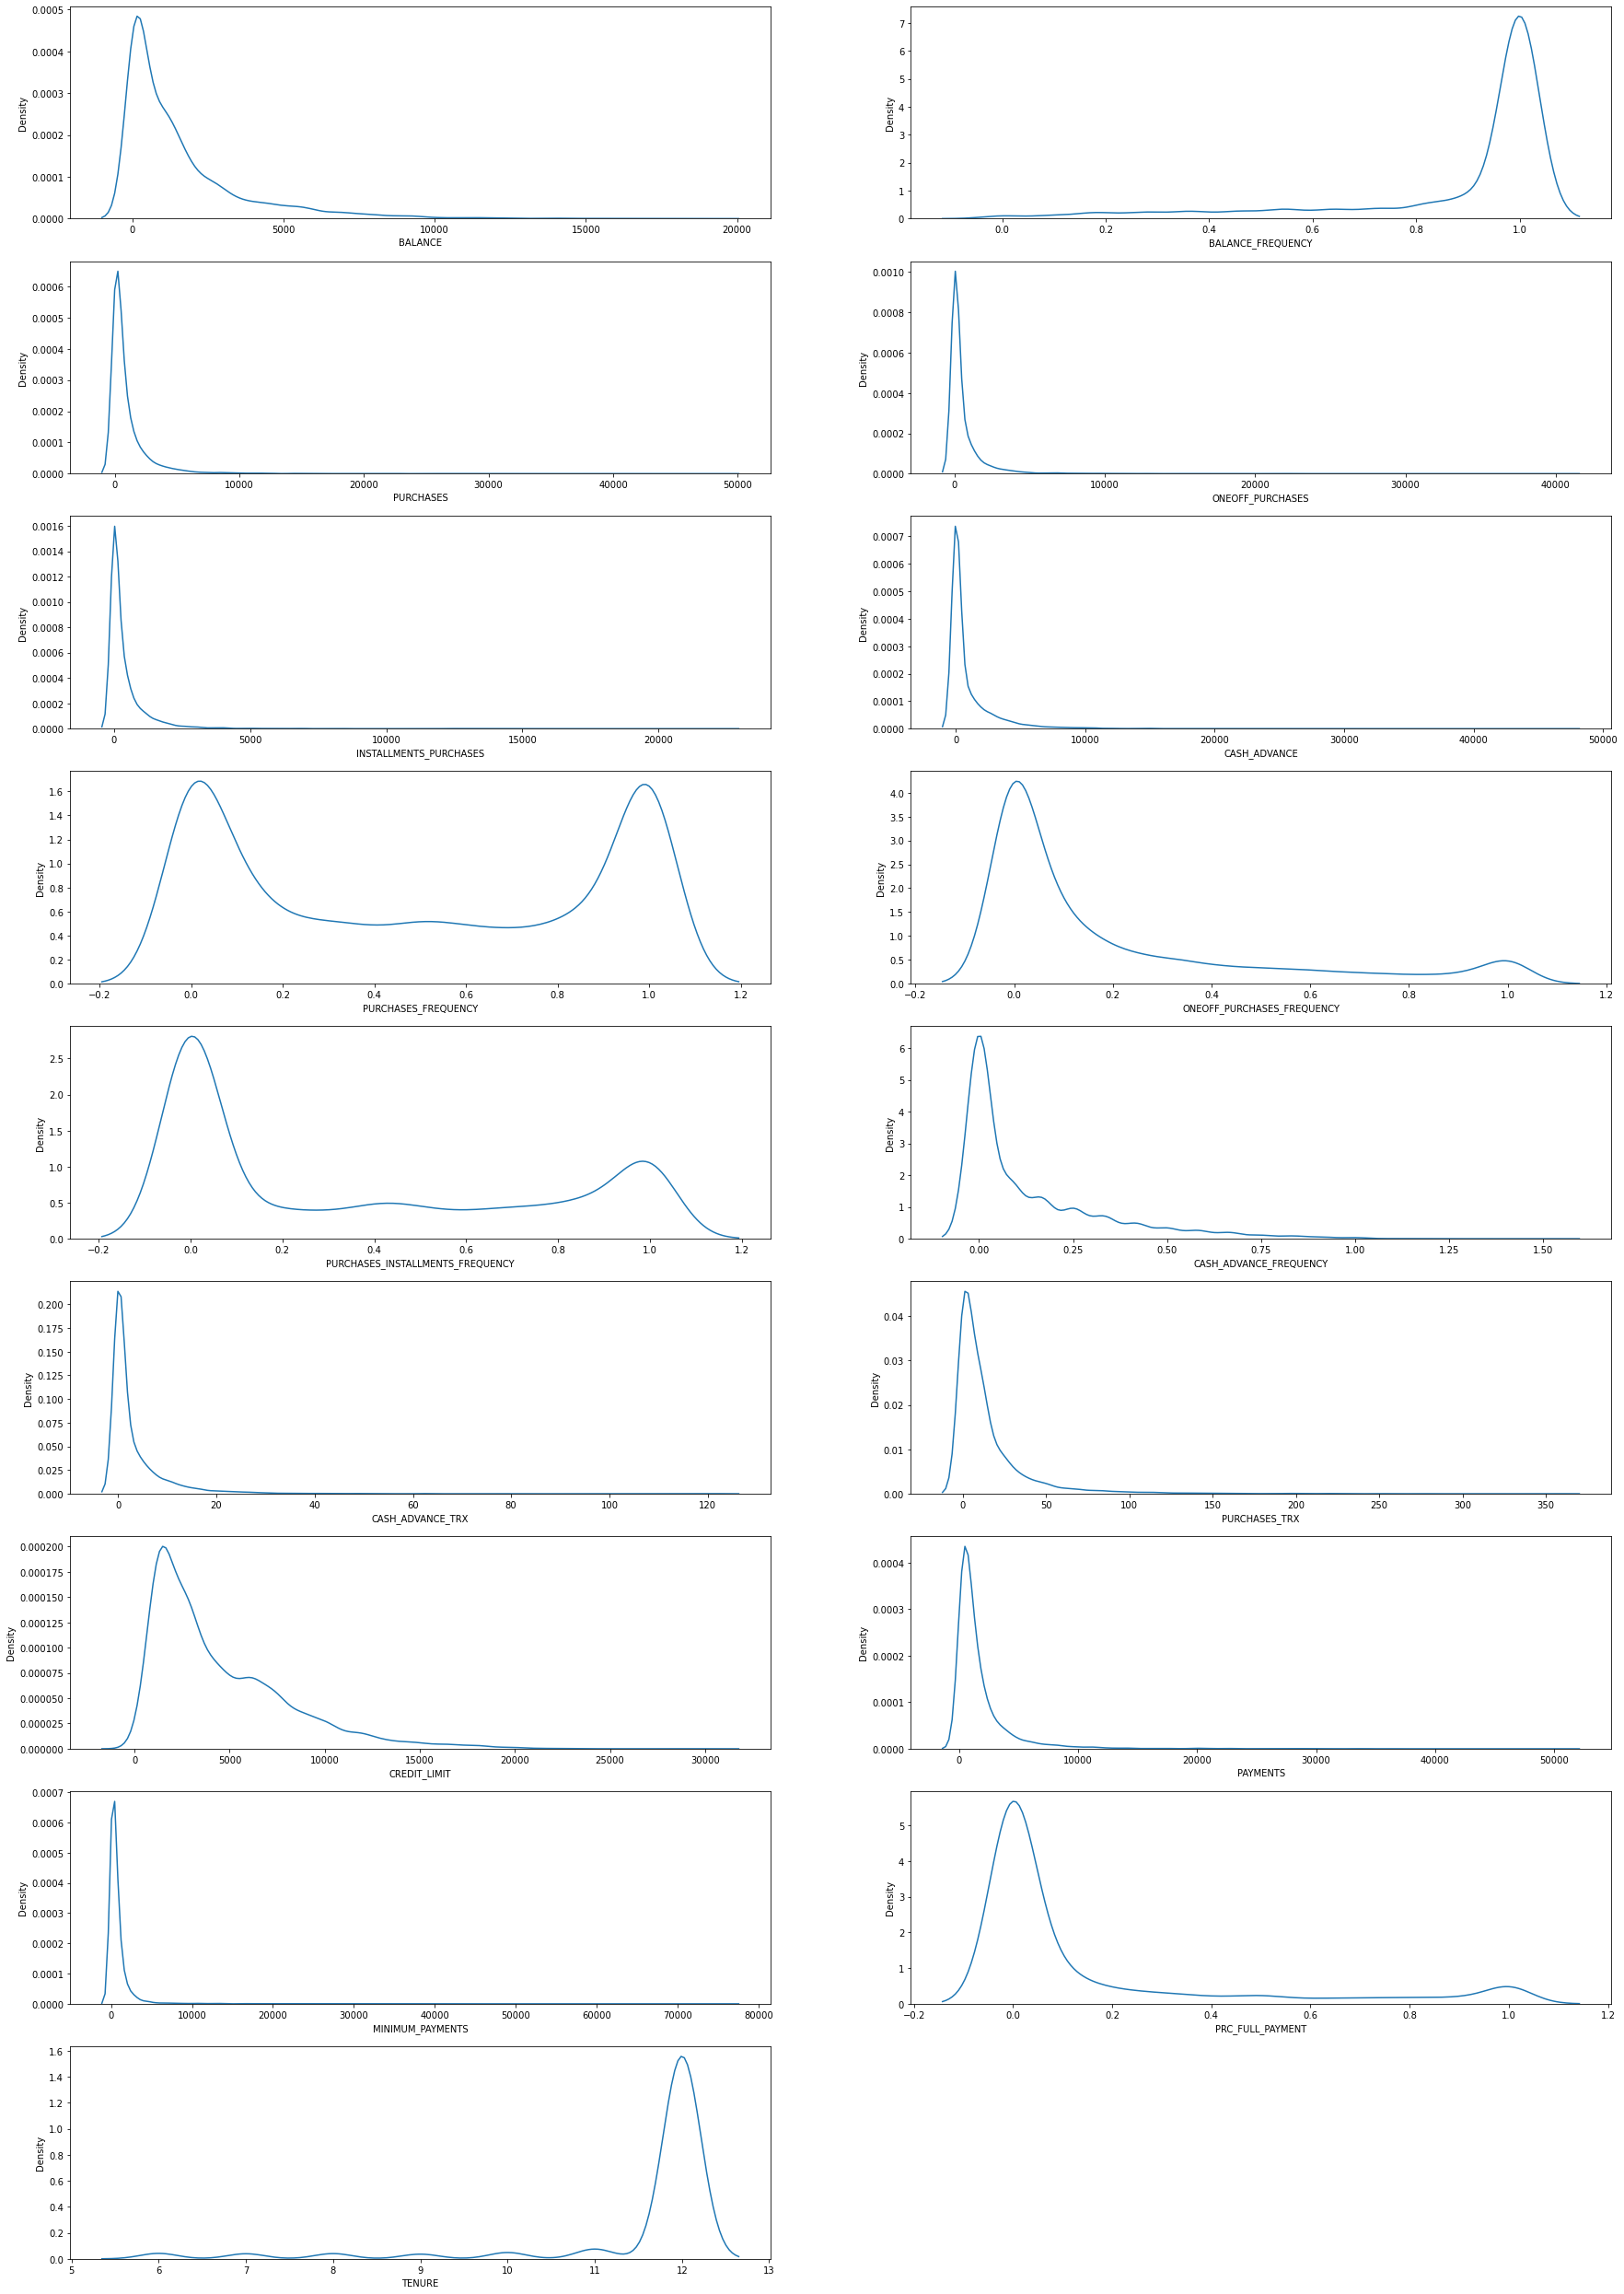

In [11]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
plt.show()

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning

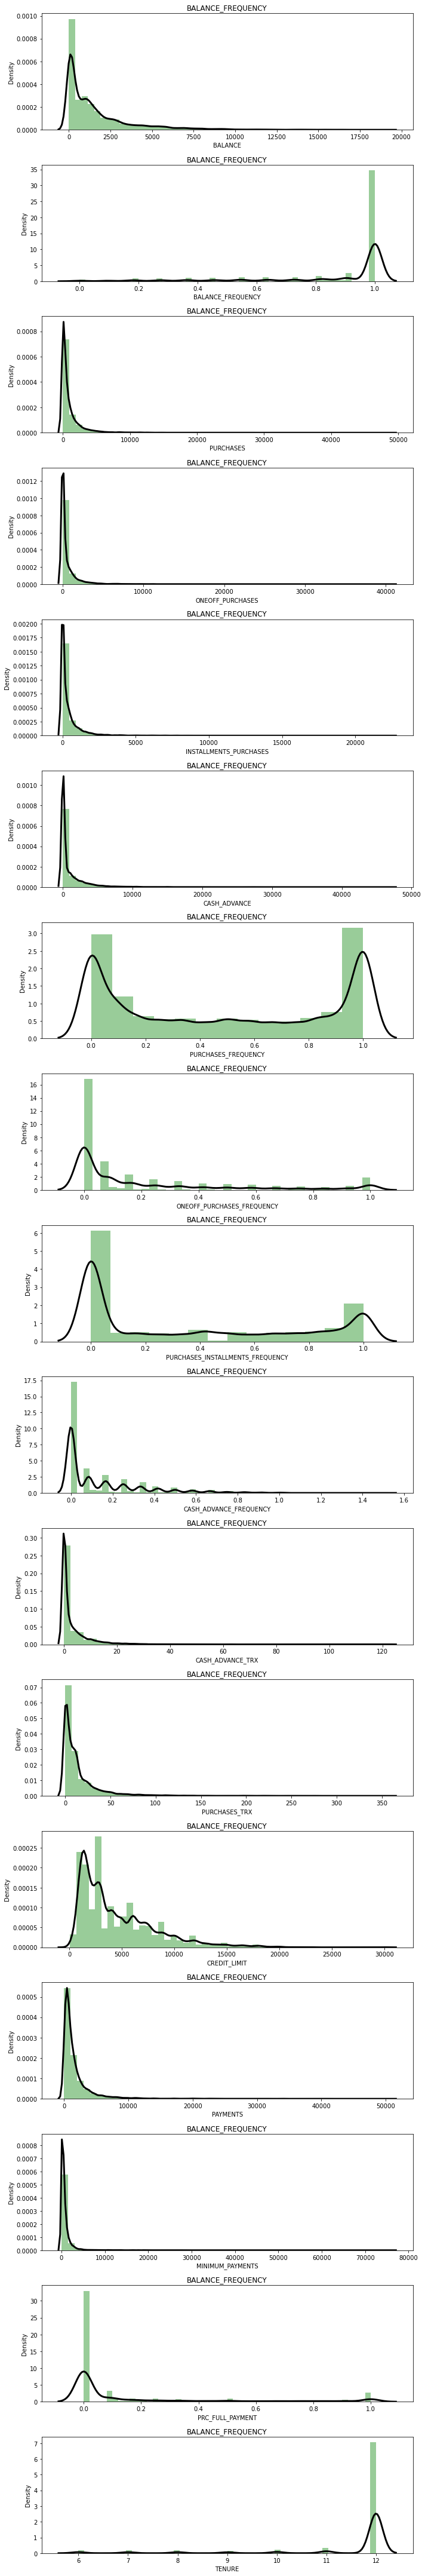

In [12]:
plt.figure(figsize=(10, 60))
for i in range(17):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={
        'color':'black',
        'bw': 0.1,
        'lw': 3,
        'label': 'KDE'
    }, hist_kws={'color':'g'})
    plt.title(df.columns[1])
    
plt.tight_layout()

### Import some machine learning libraries

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

### Scale the dataframe

In [15]:
scaler = StandardScaler()

In [16]:
scaled_df = scaler.fit_transform(df)

### Dimensionality reduction

Converting the dataframe into 2D dataframe for visualization

In [17]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df =  pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.682219,-1.076446
1,-1.138296,2.506472
2,0.969679,-0.383540
3,-0.873628,0.043166
4,-1.599433,-0.688574
...,...,...
8945,-0.359627,-2.016136
8946,-0.564366,-1.639110
8947,-0.926201,-1.810775
8948,-2.336548,-0.657950


### Hyperparameter tuning

Find 'k' value by elbow method

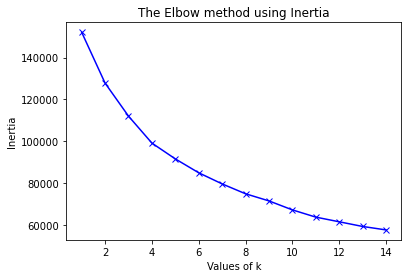

In [21]:
inertia = []
range_val = range(1, 15)
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow method using Inertia')

plt.show()

### Model building using KMeans

In [22]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({
    'cluster': kmeans_model.labels_
})], axis=1)

### Visualizing the clustered dataframe

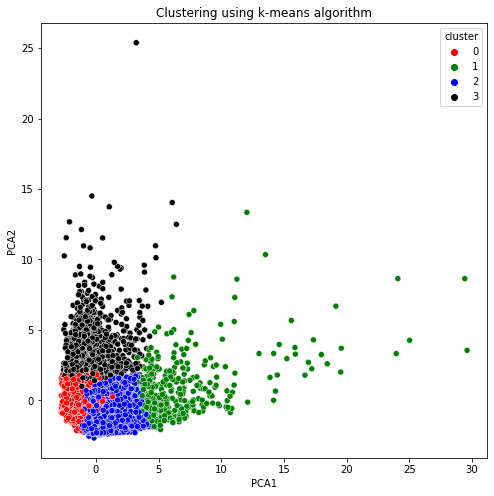

In [23]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue='cluster', data=pca_df_kmeans, palette=['red', 'green', 'blue', 'black'])
plt.title("Clustering using k-means algorithm")
plt.show()

### Find all cluster centers

In [24]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=[df.columns])

### Inverse transform the data

In [25]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1006.036966,0.789125,270.792195,210.389801,60.670225,589.809440,0.170745,0.086458,0.080969,0.113846,2.096872,2.914985,3275.340006,971.028536,584.866867,0.078261,11.447275
1,3556.148177,0.986911,7680.432073,5099.738293,2582.157195,686.680975,0.946548,0.739667,0.788577,0.073149,2.170732,89.309756,9711.097561,7301.419079,1977.054411,0.286211,11.951220
2,895.426332,0.934912,1236.730523,594.327905,642.676996,210.695779,0.885369,0.297247,0.711943,0.042599,0.790490,22.098366,4213.334399,1332.787389,650.486936,0.269216,11.594354
3,4577.199684,0.968513,491.071544,311.745004,179.410495,4485.847516,0.284436,0.136892,0.183111,0.483006,14.215524,7.530966,7499.962465,3455.052828,1995.669235,0.034898,11.385632


### Creating a target column "cluster" for storing the cluster segment

In [26]:
cluster_df = pd.concat([df, pd.DataFrame({
    'cluster': kmeans_model.labels_
})], axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


<AxesSubplot:xlabel='cluster', ylabel='count'>

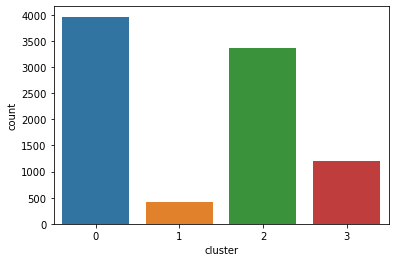

In [27]:
sns.countplot(x = 'cluster', data=cluster_df)

### Saving the kmeans clustering model and the data with cluster label

In [28]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [29]:
cluster_df.to_csv("clustered_Customer_Data.csv")

### Training and testing the model accuracy using decision tree

In [30]:
X = cluster_df.drop(['cluster'], axis=1)
y = cluster_df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [31]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred = model.predict(X_test)

In [33]:
metrics.confusion_matrix(y_test, y_pred)

array([[1101,    4,   30,   28],
       [   3,  106,   11,    1],
       [  27,   10,  975,   10],
       [  33,    0,   11,  335]], dtype=int64)

In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95      1163\n           1       0.88      0.88      0.88       121\n           2       0.95      0.95      0.95      1022\n           3       0.90      0.88      0.89       379\n\n    accuracy                           0.94      2685\n   macro avg       0.92      0.92      0.92      2685\nweighted avg       0.94      0.94      0.94      2685\n'